In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [3]:
df.shape

(1000, 7)

In [4]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [6]:
df['ObesityCategory'].value_counts()

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64

In [7]:
from sklearn.feature_selection import VarianceThreshold
numeric_df=df.select_dtypes(include='number')
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(numeric_df)
constant_cols=[column for column,var in zip(numeric_df.columns, constant_filter.variances_) if var == 0]
constant_cols

[]

In [8]:
low_var=VarianceThreshold(threshold=0.01)
low_var.fit(numeric_df)
low_var=[column for column,var in zip(numeric_df.columns, low_var.variances_) if var<0.01]
low_var

[]

In [9]:
categorical_df=df.select_dtypes(include='object')
constant_cats=[col for col in categorical_df.columns if categorical_df[col].nunique() == 1]
constant_cats

[]

In [10]:
df.shape

(1000, 7)

In [11]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [12]:
df['Gender'].value_counts()

Gender
Male      523
Female    477
Name: count, dtype: int64

In [13]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,Normal weight
1,69,0,164.127306,89.959256,33.395209,2,Obese
2,46,1,168.072202,72.930629,25.817737,4,Overweight
3,32,0,168.459633,84.886912,29.912247,3,Overweight
4,60,0,183.568568,69.038945,20.487903,3,Normal weight


In [14]:
df['ObesityCategory'].value_counts()

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64

In [15]:
df['ObesityCategory']=df['ObesityCategory'].map({'Normal weight':0,'Obese':1,'Overweight':2,'Underweight':3})
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,0
1,69,0,164.127306,89.959256,33.395209,2,1
2,46,1,168.072202,72.930629,25.817737,4,2
3,32,0,168.459633,84.886912,29.912247,3,2
4,60,0,183.568568,69.038945,20.487903,3,0


In [16]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int64  
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [18]:
df.to_csv('Cleaned_Data.csv',index=False)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Cleaned_Data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,0
1,69,0,164.127306,89.959256,33.395209,2,1
2,46,1,168.072202,72.930629,25.817737,4,2
3,32,0,168.459633,84.886912,29.912247,3,2
4,60,0,183.568568,69.038945,20.487903,3,0


<Axes: xlabel='Age', ylabel='Density'>

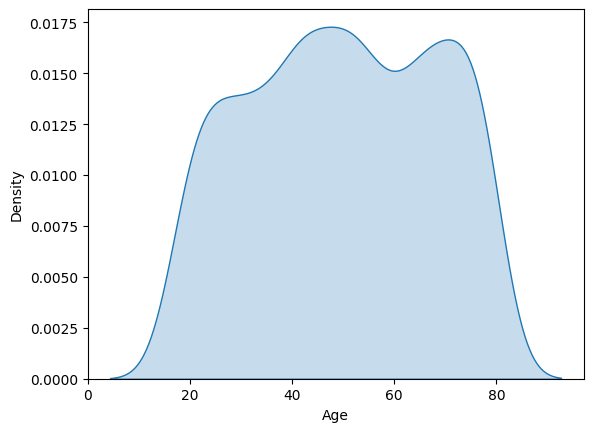

In [20]:
sns.kdeplot(x=df['Age'],fill=True)

<Axes: xlabel='Height', ylabel='Density'>

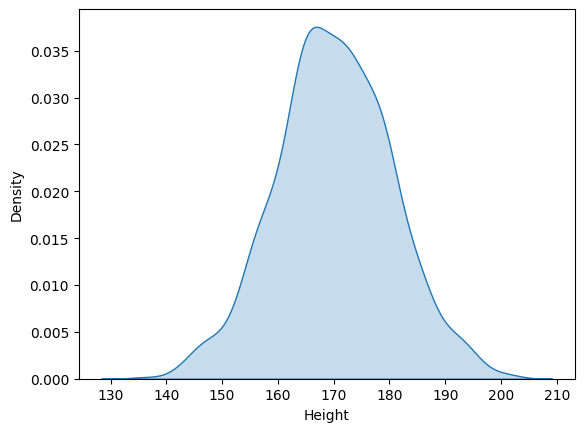

In [21]:
sns.kdeplot(x=df['Height'],fill=True)

<Axes: xlabel='Weight', ylabel='Density'>

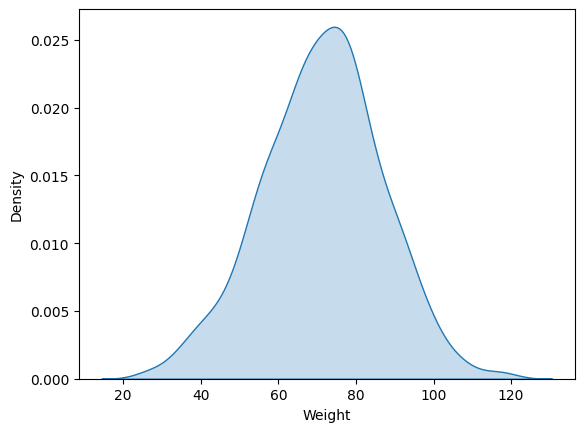

In [22]:
sns.kdeplot(x=df['Weight'],fill=True)

<Axes: >

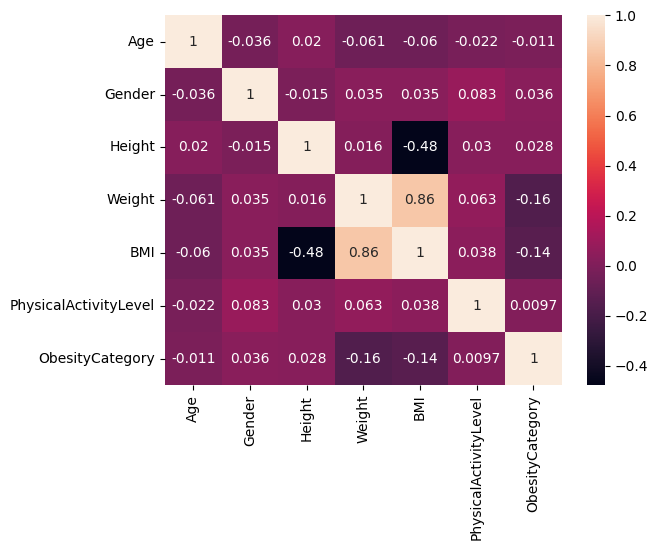

In [23]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='ObesityCategory', ylabel='Count'>

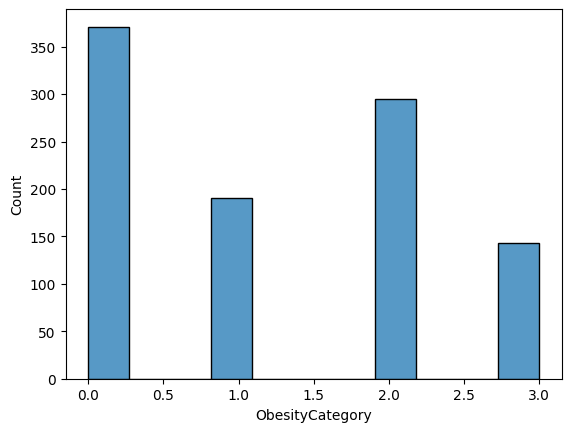

In [24]:
sns.histplot(x=df['ObesityCategory'])

<Axes: xlabel='ObesityCategory', ylabel='Age'>

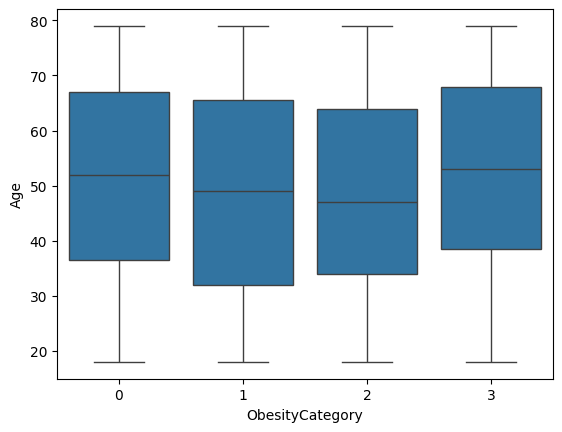

In [25]:
sns.boxplot(x=df['ObesityCategory'],y=df['Age'])

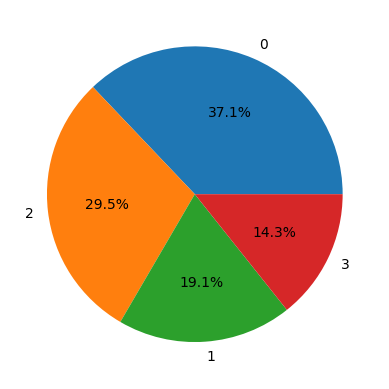

In [26]:
plt.pie(df['ObesityCategory'].value_counts(),labels=df['ObesityCategory'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [27]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,0
1,69,0,164.127306,89.959256,33.395209,2,1
2,46,1,168.072202,72.930629,25.817737,4,2
3,32,0,168.459633,84.886912,29.912247,3,2
4,60,0,183.568568,69.038945,20.487903,3,0


Accuracy:0.965
Confusion_Matrix:
[[70  0  2  0]
 [ 0 30  2  0]
 [ 2  0 63  0]
 [ 1  0  0 30]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       1.00      0.94      0.97        32
           2       0.94      0.97      0.95        65
           3       1.00      0.97      0.98        31

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200



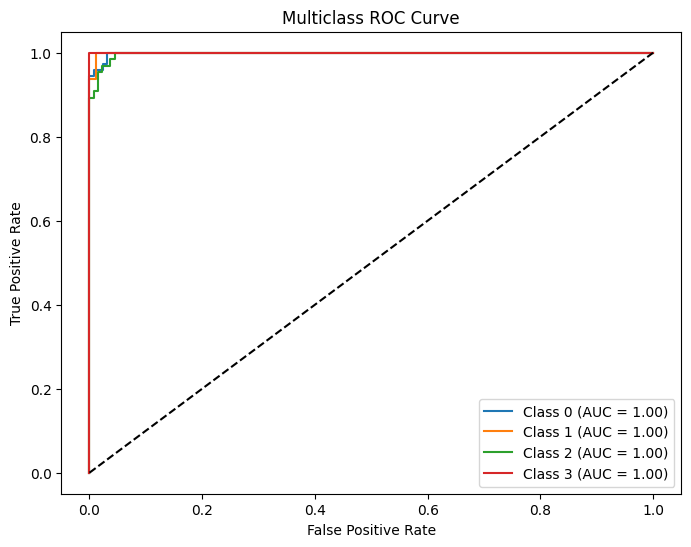

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
x=df.drop('ObesityCategory',axis=1)
y=df['ObesityCategory']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification_Report:\n{classification_report(y_test,y_pred)}')
y_prob = model.predict_proba(x_test)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()


In [29]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,0
1,69,0,164.127306,89.959256,33.395209,2,1
2,46,1,168.072202,72.930629,25.817737,4,2
3,32,0,168.459633,84.886912,29.912247,3,2
4,60,0,183.568568,69.038945,20.487903,3,0


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\kishore\anaconda3\envs\anaconda1\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_depth", "subsample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy:0.955
Confusion_Matrix:
[[70  0  2  0]
 [ 0 30  2  0]
 [ 2  1 62  0]
 [ 2  0  0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.97      0.94      0.95        32
           2       0.94      0.95      0.95        65
           3       1.00      0.94      0.97        31

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.95      0.96       200



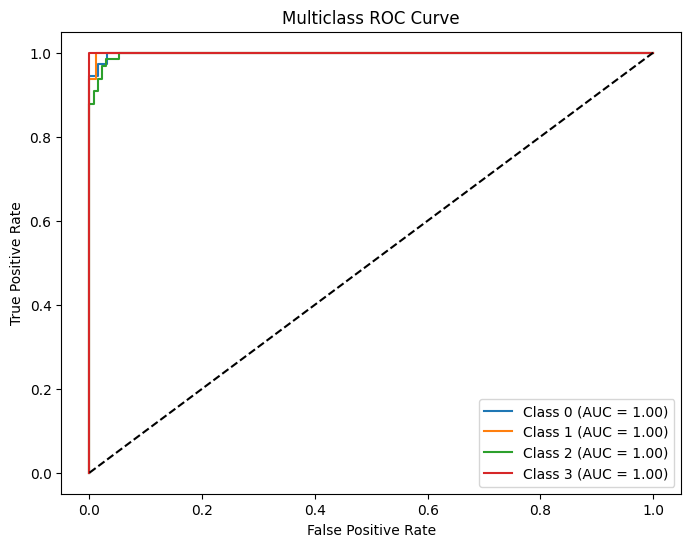

In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
import xgboost as xgb
x = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
xgb_model = xgb.XGBClassifier(booster='gblinear',objective='binary:logistic',use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}
k=KFold(n_splits=5,shuffle=True,random_state=42)
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=k,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred=best_model.predict(x_test)
print(f'Best Parameters:{grid_search.best_params_}')
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')
y_prob = best_model.predict_proba(x_test)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()


Accuracy:1.0
Accuracy:1.0
Confusion_Matrix:
[[72  0  0  0]
 [ 0 32  0  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        31

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



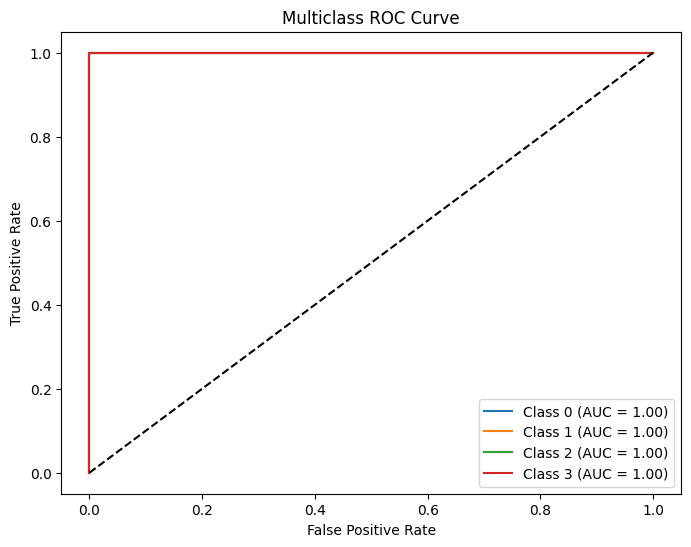

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
x = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')


y_prob = model.predict_proba(x_test)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\kishore\anaconda3\envs\anaconda1\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy:0.98
Confusion_Matrix:
[[71  0  0  1]
 [ 0 31  1  0]
 [ 2  0 63  0]
 [ 0  0  0 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       1.00      0.97      0.98        32
           2       0.98      0.97      0.98        65
           3       0.97      1.00      0.98        31

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



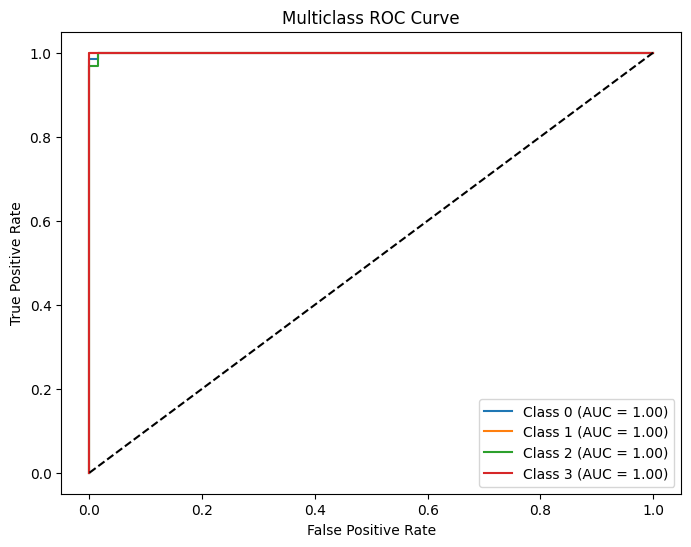

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
import xgboost as xgb
x = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
xgb_model = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}
k=KFold(n_splits=5,shuffle=True,random_state=42)
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=k,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model1 = grid_search.best_estimator_
y_pred=best_model1.predict(x_test)
print(f'Best Parameters:{grid_search.best_params_}')
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')
y_prob = best_model1.predict_proba(x_test)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\kishore\anaconda3\envs\anaconda1\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:59:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_paralle_tree", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy:0.98
Confusion_Matrix:
[[71  0  0  1]
 [ 0 31  1  0]
 [ 2  0 63  0]
 [ 0  0  0 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       1.00      0.97      0.98        32
           2       0.98      0.97      0.98        65
           3       0.97      1.00      0.98        31

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



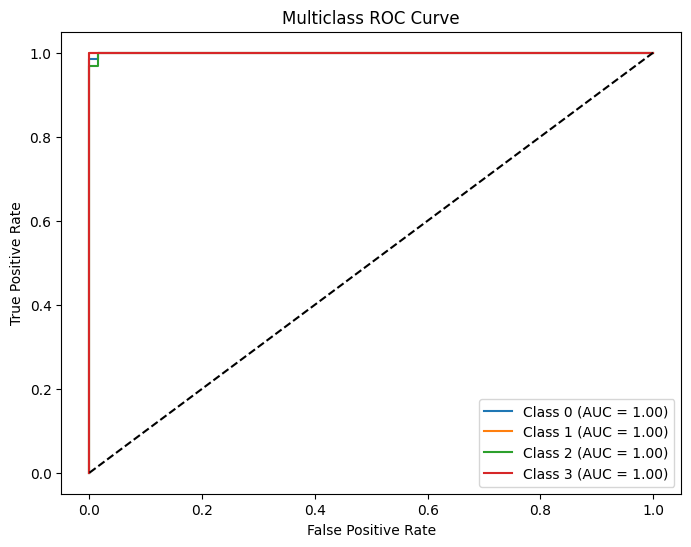

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
import xgboost as xgb
x = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
xgb_model = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',use_label_encoder=False, eval_metric='logloss',num_paralle_tree=100,random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}
k=KFold(n_splits=5,shuffle=True,random_state=42)
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=k,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred=best_model.predict(x_test)
print(f'Best Parameters:{grid_search.best_params_}')
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion_Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')
y_prob = best_model.predict_proba(x_test)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()


In [40]:
import pickle
filename = 'trained_model.sav'
with open('trained_model.sav', 'wb') as f:
    pickle.dump((best_model1,scaler), f)
loaded_model = pickle.load(open('trained_model.sav','rb'))
